In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Predict co2 emissions of power plants accross Europe.

Data from the JRC Open Power Plants Database (JRC-PPDB-OPEN) published on December 2019. It can be accesed at https://data.jrc.ec.europa.eu/dataset/9810feeb-f062-49cd-8e76-8d8cfd488a05

## Table of contents

- [Plant characteristics](#unit-table-characteristics-of-each-plant)
- [Operation data](#temporal-table) for several years
- [Emissions data](#emission-data) for available plants
- [Capacity and emissions map](#map-plots-of-plants-by-capacity-and-emissions)
- [Number of plants per country](#map-according-to-number-of-power-plants-in-dataset)
- [Performance metrics](#performance-table) of plants


### Unit table: characteristics of each plant

In [28]:
unit = pd.read_csv('DATA/JRC_OPEN_UNITS.csv')
unit.head()

,eic_p,eic_g,name_p,name_g,capacity_p,capacity_g,type_g,lat,lon,country,NUTS2,status_g,year_commissioned,year_decommissioned,water_type,cooling_type,water_withdrawal,water_consumption
0,54W-KOMAN0000066,54W-KOMAN-G2008E,KOMANG,KOMANG2,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,AL01,COMMISSIONED,NaN,NaN,Freshwater,NaN,NaN,NaN
1,54W-KOMAN0000066,54W-KOMAN-G1007L,KOMANG,KOMANG1,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,AL01,COMMISSIONED,NaN,NaN,Freshwater,NaN,NaN,NaN
2,54W-KOMAN0000066,54W-KOMAN-G30097,KOMANG,KOMANG3,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,AL01,COMMISSIONED,NaN,NaN,Freshwater,NaN,NaN,NaN
3,54W-KOMAN0000066,54W-KOMAN-G4010H,KOMANG,KOMANG4,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,AL01,COMMISSIONED,NaN,NaN,Freshwater,NaN,NaN,NaN
4,54W-FIERZ000001A,54W-FIERZ-G1002P,FIERZAG,FIERZAG1,500.0,125.0,Hydro Water Reservoir,42.251,20.043,Albania,AL01,COMMISSIONED,NaN,NaN,Freshwater,NaN,NaN,NaN


In [29]:
unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117 entries, 0 to 7116
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eic_p                7023 non-null   object 
 1   eic_g                6815 non-null   object 
 2   name_p               5534 non-null   object 
 3   name_g               6810 non-null   object 
 4   capacity_p           5439 non-null   float64
 5   capacity_g           7117 non-null   float64
 6   type_g               7117 non-null   object 
 7   lat                  4951 non-null   float64
 8   lon                  4951 non-null   float64
 9   country              7117 non-null   object 
 10  NUTS2                4923 non-null   object 
 11  status_g             5534 non-null   object 
 12  year_commissioned    1777 non-null   float64
 13  year_decommissioned  164 non-null    float64
 14  water_type           7117 non-null   object 
 15  cooling_type         2343 non-null   o

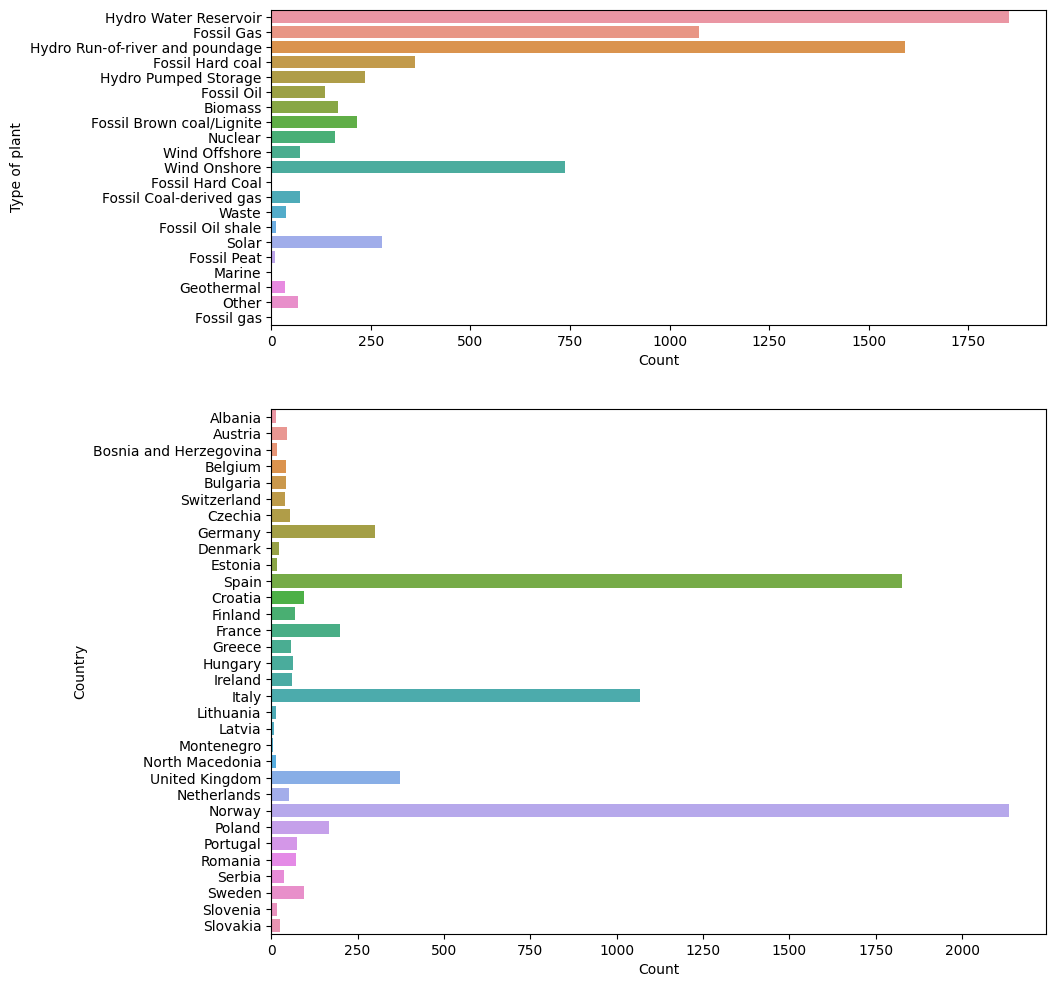

In [30]:
fig,axs = plt.subplots(2, 1, figsize=(10,12), height_ratios=[6,10])
sns.countplot(data=unit, y='type_g', ax=axs[0]).set(xlabel='Count', ylabel='Type of plant')
sns.countplot(data=unit, y='country', ax=axs[1]).set(xlabel='Count', ylabel='Country')
plt.show()

From the above figure it's notable that most power plants are hydro, which are mainly located in Norway, so the dataset may be biased

## Temporal table

In [31]:
temp = pd.read_csv('DATA/JRC_OPEN_TEMPORAL.csv')
temp.head()

,eic_p,eic_g,type_g,cyear,Generation,cf,time_coverage,co2emitted
0,18WABO1-12345-0X,18WABO1-12345-D7,Fossil Hard coal,2015,1872563,0.626,1.000,1.940210e+09
1,18WABO2-12345-0N,18WABO2-12345-DY,Fossil Hard coal,2015,4056615,0.864,1.000,3.842890e+09
2,48WSTN0000ABTHBN,48W0000000ABTH7Y,Fossil Hard coal,2015,2216884,0.617,0.767,2.625680e+09
3,48WSTN000ABTHGTK,48W000000ABTH7G2,Fossil Oil,2015,12,0.706,0.000,1.309290e+04
4,48WSTN0000ABTHBN,48W0000000ABTH8W,Fossil Hard coal,2015,2308023,0.622,0.791,2.733620e+09


In [32]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6724 entries, 0 to 6723
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   eic_p          6724 non-null   object 
 1   eic_g          6724 non-null   object 
 2   type_g         6724 non-null   object 
 3   cyear          6724 non-null   int64  
 4   Generation     6724 non-null   int64  
 5   cf             6715 non-null   float64
 6   time_coverage  6724 non-null   float64
 7   co2emitted     6335 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 420.4+ KB


In [33]:
temp.describe()

,cyear,Generation,cf,time_coverage,co2emitted
count,6724.000000,6.724000e+03,6715.000000,6724.000000,6.335000e+03
mean,2016.477692,1.140533e+06,0.370266,0.873143,4.810826e+08
std,1.123998,1.805361e+06,0.282031,0.265887,9.346597e+08
min,2015.000000,-2.220400e+04,-0.021000,0.000000,-8.616990e+05
25%,2015.000000,1.064795e+05,0.117000,0.939500,0.000000e+00
50%,2016.000000,4.530965e+05,0.331000,0.997000,8.185150e+06
75%,2017.000000,1.347804e+06,0.600000,1.000000,6.092225e+08
max,2018.000000,1.203326e+07,1.566000,1.000000,7.856350e+09


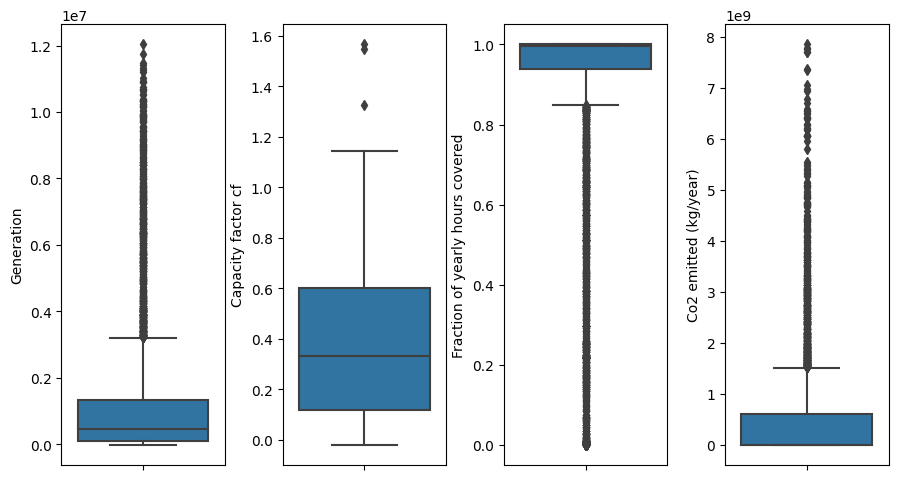

In [34]:
fig,axs = plt.subplots(1,4, figsize=(9,5))
fig.tight_layout()
sns.boxplot(y=temp['Generation'], ax=axs[0])
sns.boxplot(y=temp['cf'], ax=axs[1]).set(ylabel='Capacity factor cf')
sns.boxplot(y=temp['time_coverage'], ax=axs[2]).set(ylabel = 'Fraction of yearly hours covered')
sns.boxplot(y=temp['co2emitted'], ax=axs[3]).set(ylabel='Co2 emitted (kg/year)')
plt.show()

- Generation is concetrated towards smaller plants
- Capacity factor is very spread: there are multiple technologies in the dataset,from renewables with low cf to fossil plants with very high cf
- Time coverage is highly concentrated towards 1
- Co2 emitted es very concetrated towards negligible emissions as a big portion of the dataset are renewable plants.

### Emission data

In [35]:
# Load emission data
mean_emis = temp.groupby(['eic_p','eic_g'])[['co2emitted','Generation','cf','time_coverage']].mean().reset_index()

unit = unit.merge(mean_emis,how='left',on=['eic_p','eic_g'])
unit.head()

,eic_p,eic_g,name_p,name_g,capacity_p,capacity_g,type_g,lat,lon,country,...,year_commissioned,year_decommissioned,water_type,cooling_type,water_withdrawal,water_consumption,co2emitted,Generation,cf,time_coverage
0,54W-KOMAN0000066,54W-KOMAN-G2008E,KOMANG,KOMANG2,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,...,NaN,NaN,Freshwater,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54W-KOMAN0000066,54W-KOMAN-G1007L,KOMANG,KOMANG1,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,...,NaN,NaN,Freshwater,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54W-KOMAN0000066,54W-KOMAN-G30097,KOMANG,KOMANG3,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,...,NaN,NaN,Freshwater,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54W-KOMAN0000066,54W-KOMAN-G4010H,KOMANG,KOMANG4,600.0,150.0,Hydro Water Reservoir,42.103,19.822,Albania,...,NaN,NaN,Freshwater,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54W-FIERZ000001A,54W-FIERZ-G1002P,FIERZAG,FIERZAG1,500.0,125.0,Hydro Water Reservoir,42.251,20.043,Albania,...,NaN,NaN,Freshwater,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Reduce the number of generation categories
def classify_plants(type_plant):
    if 'oil' in type_plant.lower():
        return 'Oil'
    elif 'coal' in type_plant.lower():
        return 'Coal'
    elif 'gas' in type_plant.lower():
        return 'Natural Gas'
    elif 'hydro' in type_plant.lower():
        return 'Hydro'
    elif 'wind' in type_plant.lower():
        return 'Wind'
    else:
        return type_plant
    
unit['Classification'] = unit['type_g'].apply(classify_plants)

In [37]:
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd

geometry = gpd.points_from_xy(unit["lon"], unit["lat"])
gdf = gpd.GeoDataFrame(unit, geometry=geometry, crs=4326)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7117 entries, 0 to 7116
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   eic_p                7023 non-null   object  
 1   eic_g                6815 non-null   object  
 2   name_p               5534 non-null   object  
 3   name_g               6810 non-null   object  
 4   capacity_p           5439 non-null   float64 
 5   capacity_g           7117 non-null   float64 
 6   type_g               7117 non-null   object  
 7   lat                  4951 non-null   float64 
 8   lon                  4951 non-null   float64 
 9   country              7117 non-null   object  
 10  NUTS2                4923 non-null   object  
 11  status_g             5534 non-null   object  
 12  year_commissioned    1777 non-null   float64 
 13  year_decommissioned  164 non-null    float64 
 14  water_type           7117 non-null   object  
 15  cooling_type 

### Map plots of plants by capacity and emissions

c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\cartopy\mpl\

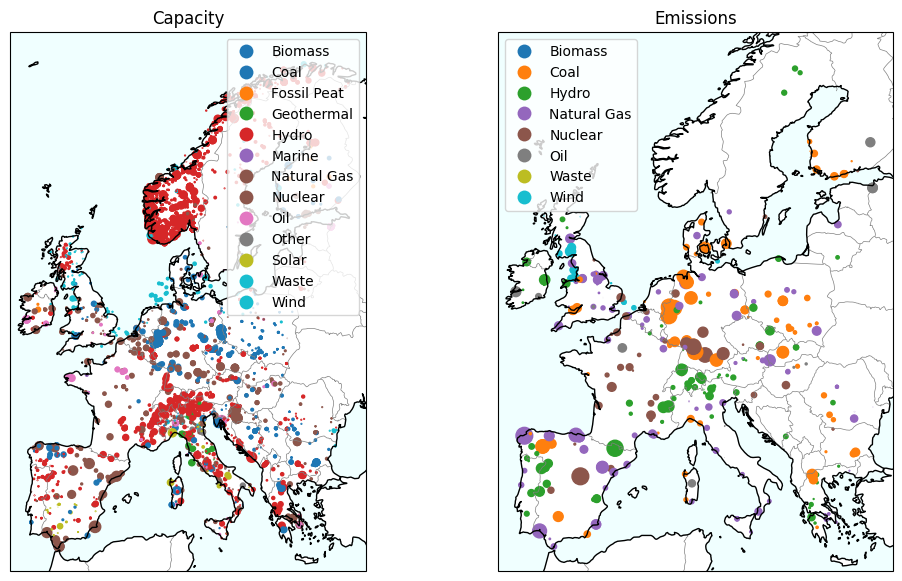

In [38]:
fig,axs = plt.subplots(1,2, figsize=(12, 7), subplot_kw={'projection': ccrs.PlateCarree()})

gdf.plot(
    ax=axs[0],
    column="Classification",
    markersize=gdf.capacity_p / 70,
    legend=True
)
axs[0].add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
axs[0].coastlines()
axs[0].add_feature(cartopy.feature.OCEAN, color="azure")
axs[0].set_title('Capacity')


gdf.dropna(axis=0, subset=['co2emitted']).plot(
    ax=axs[1],
    column="Classification",
    markersize=gdf.co2emitted / 5e7,
    legend=True
)
axs[1].add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
axs[1].coastlines()
axs[1].add_feature(cartopy.feature.OCEAN, color="azure")
axs[1].set_title('Emissions')
plt.show()

Bubble size represent capacity installed and yearly emissions, respectively.

## Map according to number of power plants in dataset

In [39]:
# Read the shapefile containing the country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country data into the world dataframe based on the country names
merged_data = world.merge(unit, left_on='name', right_on='country')
counts = merged_data['country'].value_counts()
merged_data['count'] = merged_data['country'].map(counts)

# Create a custom colormap
cmap = plt.cm.get_cmap('Blues')


C:\Users\danip\AppData\Local\Temp\ipykernel_14380\1699973647.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\danip\AppData\Local\Temp\ipykernel_14380\1699973647.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


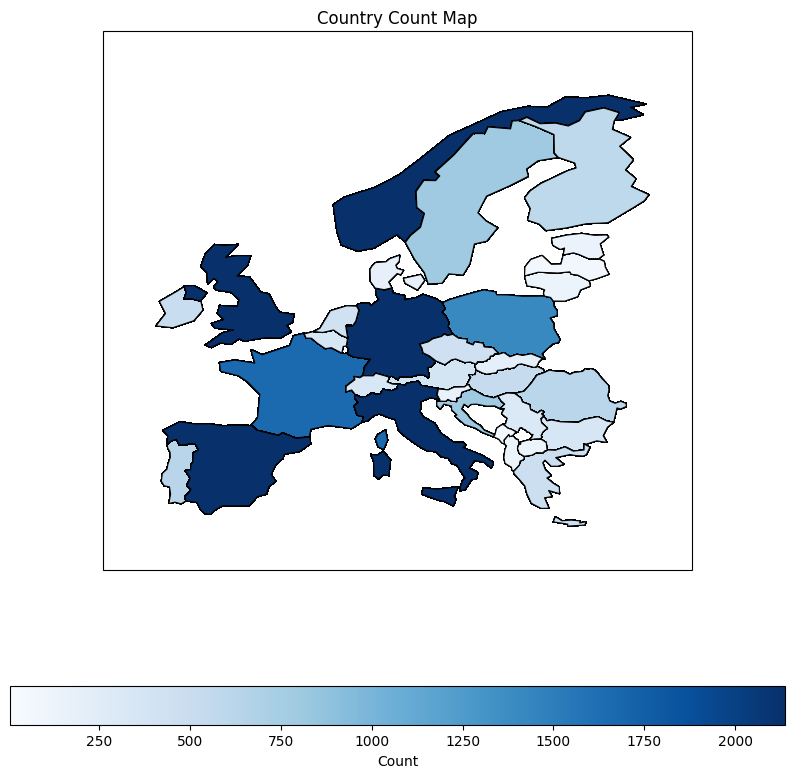

In [40]:
# Create a cartopy GeoAxes object
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 10))

# Set the extent based on the longitude and latitude of Europe
ax.set_extent([unit['lon'].min()-5, unit['lon'].max()+5,
               unit['lat'].min()-5, unit['lat'].max()+5], crs=projection)

# Plot the country boundaries and color each country based on the count column
for _, country in merged_data.iterrows():
    ax.add_geometries(country.geometry, crs=projection, facecolor=cmap(country['count']), edgecolor='black', linewidth=0.8)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged_data['count'].min(), vmax=merged_data['count'].max()))
plt.colorbar(sm, ax=ax, orientation='horizontal', label='Count')

# Set a title for the map
ax.set_title('Country Count Map')

plt.show()

## Performance table

In [41]:
perf = pd.read_csv('DATA/JRC_OPEN_PERFORMANCE.csv')
perf.head()

,eic_p,eic_g,min_load,ramp_up,ramp_down,minimum_up_time,minimum_down_time,eff,best_source
0,54W-KOMAN0000066,54W-KOMAN-G2008E,0.211,0.014,-0.014,60.0,60.0,NaN,NaN
1,54W-KOMAN0000066,54W-KOMAN-G1007L,0.211,0.014,-0.014,60.0,60.0,NaN,NaN
2,54W-KOMAN0000066,54W-KOMAN-G30097,0.211,0.014,-0.014,60.0,60.0,NaN,NaN
3,54W-KOMAN0000066,54W-KOMAN-G4010H,0.211,0.014,-0.014,60.0,60.0,NaN,NaN
4,54W-FIERZ000001A,54W-FIERZ-G1002P,0.211,0.014,-0.014,60.0,60.0,NaN,NaN


In [42]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117 entries, 0 to 7116
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   eic_p              7023 non-null   object 
 1   eic_g              6815 non-null   object 
 2   min_load           5756 non-null   float64
 3   ramp_up            5756 non-null   float64
 4   ramp_down          5756 non-null   float64
 5   minimum_up_time    5749 non-null   float64
 6   minimum_down_time  5749 non-null   float64
 7   eff                1743 non-null   float64
 8   best_source        1743 non-null   object 
dtypes: float64(6), object(3)
memory usage: 500.5+ KB
